OBJETIVO: 

- Analizar como es la vida en Boston.

In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import folium 
from folium import plugins 
import statistics 
from scipy import stats 

In [13]:

file_path = 'C:/Users/rodri/OneDrive/Escritorio/boston_house_prices.csv'
boston = pd.read_csv(file_path) 

boston.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

NOMENCLATURA DE LAS VARIABLES DEL ARCHIVO “boston_house_price”. 

CRIM: Índice de criminalidad per cápita 

ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 s.f. (equivalente a 2.223 metros cuadrados). 

INDUS: Proporción de superficie de negocio no minorista. 

CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso) 

NOX: Concentración de óxidos de nitrógeno (partes por 10 millones) 

RM: Número promedio de habitaciones por vivienda 

AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940 

DIS: Distancias ponderadas a cinco centros de empleo de Boston 

RAD: Índice de accesibilidad a las autopistas radiales 

TAX: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad 

PTRATIO: Ratio de alumnos por profesor 

B: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana 

LSTAT: Porcentaje de población de “estatus de bajo nivel” 

MEDV: Valor medio de viviendas en propiedad (en miles de dólares) 

In [5]:

description = boston.describe()
description 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


NOMENCLATURA DE LA TABLA. 

count: Cantidad de datos por cada variable. 

mean: La media.

std: Desviación estándar. Es la variación o dispersión en la que los puntos de datos individuales difieren de la media de la variable en estudio. 

min: Valor mínimo de la variable. 

25%: Percentil. Indicador que señala que una vez ordenados los datos de menor a mayor, este se encuentra en la posición del 25% de los datos desde el dato menor al mayor.

50%: Percentil. Indicador que señala que una vez ordenados los datos de menor a mayor, este se encuentra en la posición del 50% de los datos desde el dato menor al mayor.

75%: Percentil. Indicador que señala que una vez ordenados los datos de menor a mayor, este se encuentra en la posición del 75% de los datos desde el dato menor al mayor.

max: Valor máximo de la variable. 



ANALISIS DESCRIPTIVO DE LAS VARIABLES DE LA TABLA. 

CRIM: En cuanto al índice de criminalidad per cápita de Boston, este tiene una media de 3,61 crímenes per cápita; con una desviación estándar de 8,60 lo cual indica que existe una gran variabilidad en los índices de criminalidad per cápita de Boston. 

ZN: Esta variable que representa la proporción de superficie residencial establecida en lotes mayores de 25.000 s.f. o pies cuadrados equivalentes a 2322,576 metros cuadrados o 0,23 hectareas. Tiene una media de 11,36, y su rango de valores va desde 0 a 100, la mayoría de los datos tiene un valor entre 0 y 30. 

INDUS: La proporción de superficie de negocio no minorista tiene una media de 11,14, con un valor máximo de 27, 74. 

CHAS: Esta variable muestra que una fracción muy pequeña de las viviendas están en la ribera del río Charles, siendo de un 7% del total de las viviendas. 

NOX: La concentración de oxido de Nitrógeno en la atmosfera, medida en partes por cada 10 millones de partículas, tiene una media de 0,55 con una dispersión moderada. Siendo su valor mínimo de 0,39 y su valor máximo de 0,87. 

RM: La cantidad media de habitaciones por vivienda es de 6,28, con una desviación estándar de 0,70. Además, su rango de valores está entre 3,56 y 8,78. 

AGE: La proporción de viviendas en propiedad ocupadas y que además fueron construidas antes de 1940, tiene una media de 68,57%. 

DIS: La distancia promedio ponderada a los cinco centros de empleo de Boston es de 3,80, y la desviación estándar es de 2,11. 

RAD: El índice de accesibilidad a las autopistas radiales varía de 1 a 24, con un valor medio de 9,55. 

TAX: El valor de la media del pago de impuestos de bienes inmuebles es de 408,24, y su rango de valores varia desde 187 hasta 711. 

PTRATIO: El ratio de alumnos por profesor tiene una media de 18,46, el que varía entre 12,60 y 22,00. 

B: Este índice tiene un valor esperado promedio de población descendiente afroamericana en Boston es de 0,63. Señala la magnitud de la desviación de la proporción de Afroamericanos en un barrio de Boston respecto al valor 0,63. La media de esta variable es de 356,68 y su desviación estándar es de 91,29; lo que indica una gran dispersión de los datos. 

LSTAT: El porcentaje de la población de estatus de bajo nivel tiene una media de 12,65%, y su rango varía desde 1,73% hasta 37,97%. 

MEDV: El valor medio de las viviendas en propiedad es de 22,53 (en miles de dólares). Su rango de valores fluctúa entre los 5,00 y los 50,00. 

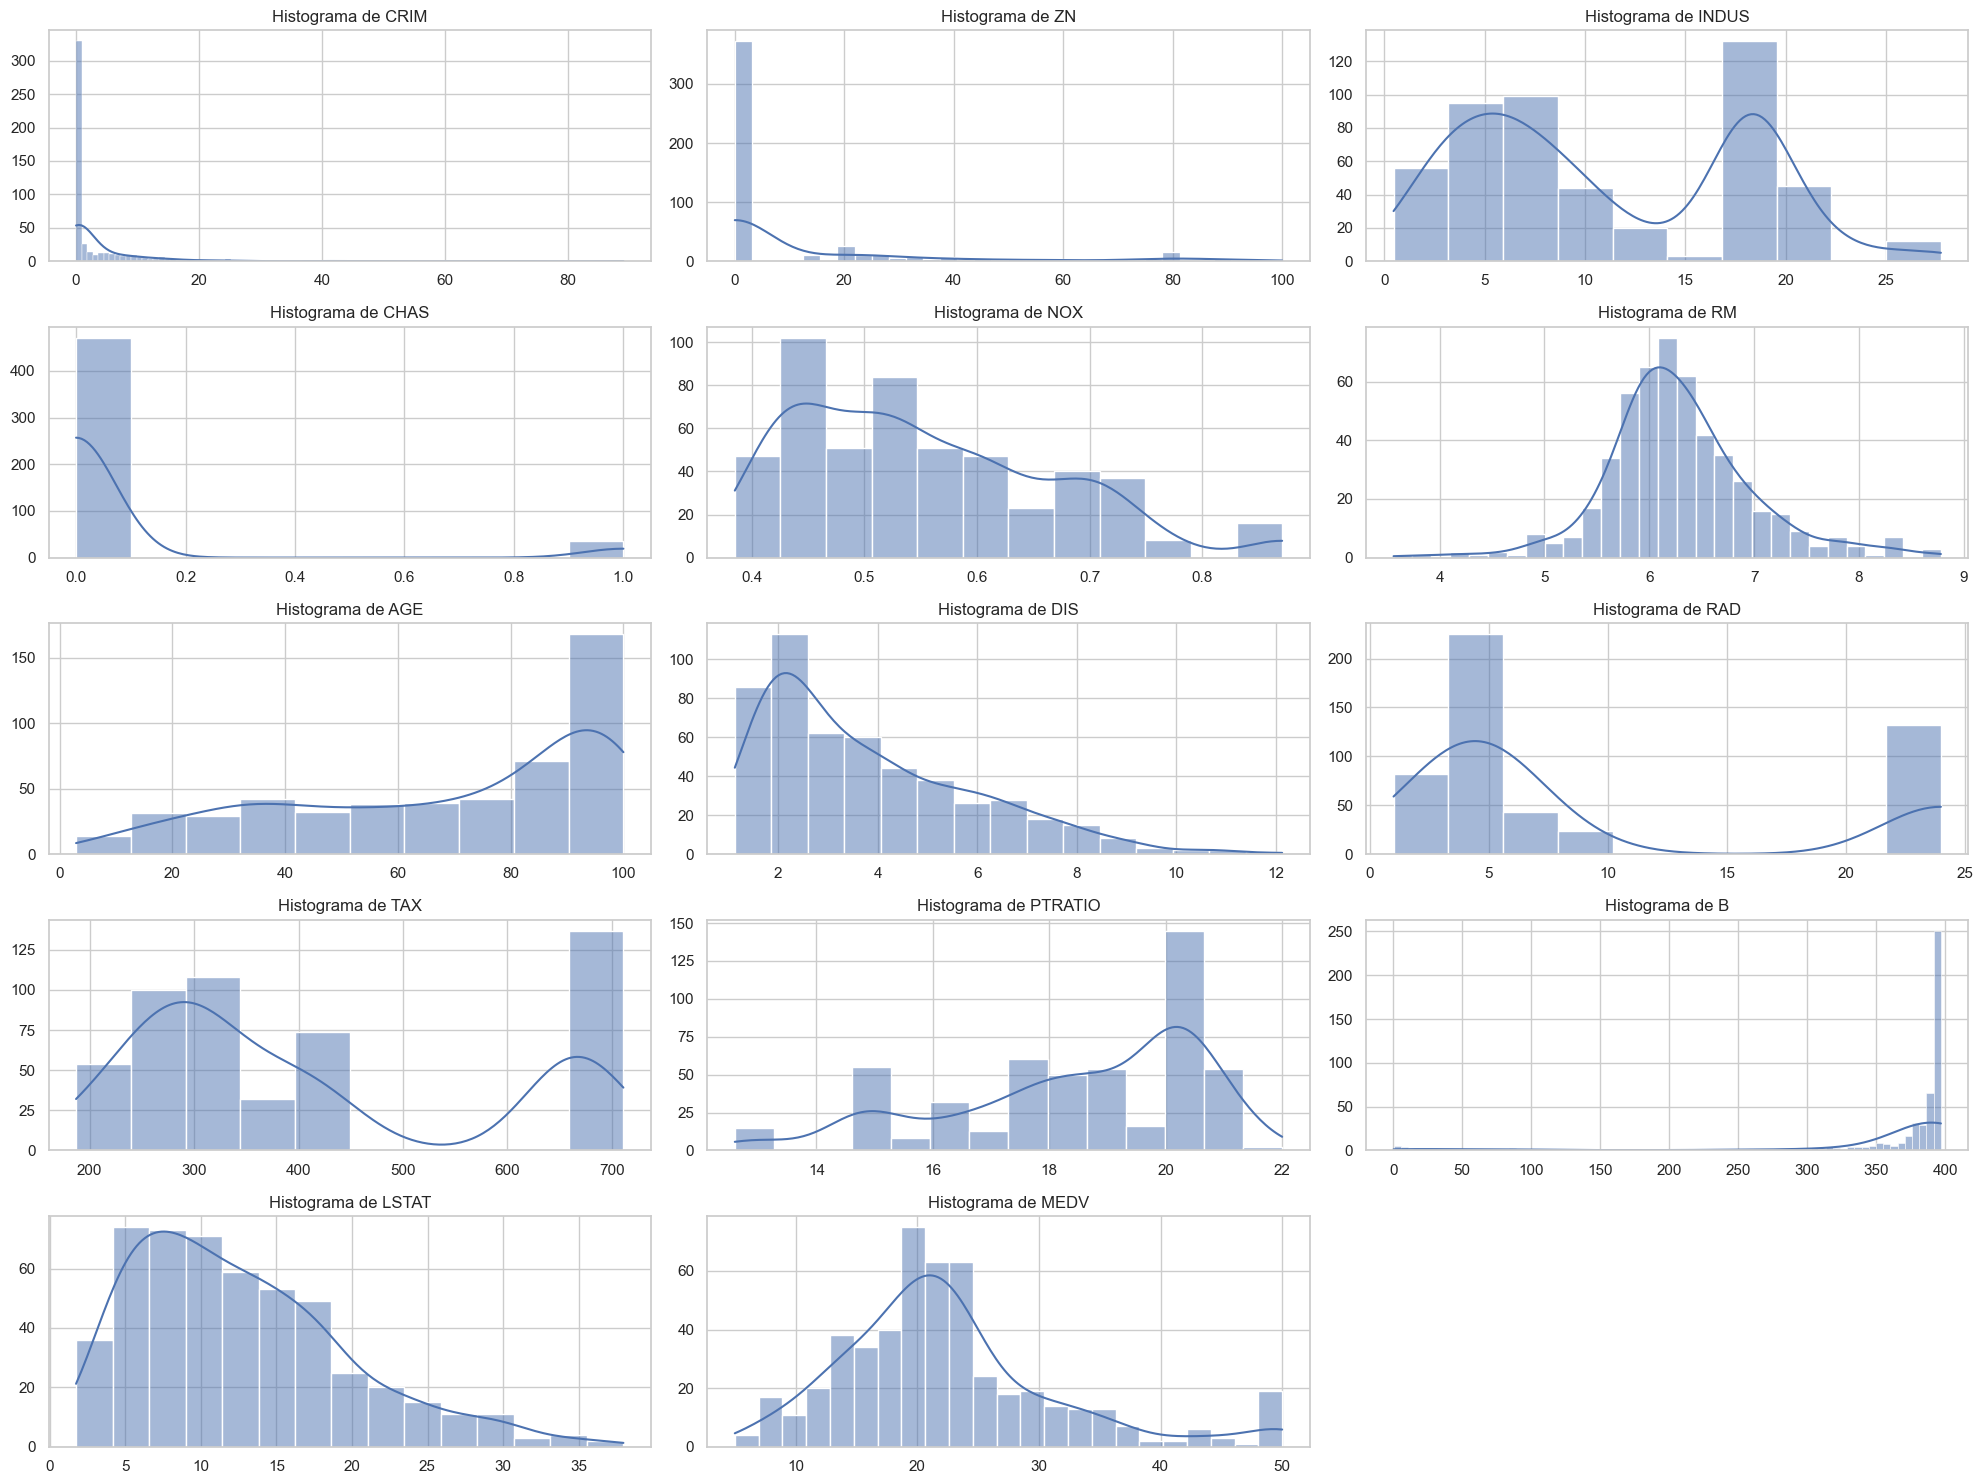

In [11]:

sns.set_theme(style="whitegrid")  
plt.figure(figsize=(20, 15))  


variables = boston.columns 


for i, var in enumerate(variables): 
     
    plt.subplot(5, 3, i + 1) 
    sns.histplot(boston[var], kde=True) 
    plt.title(f'Histograma de {var}')  
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout() 
plt.show() 

ANALISIS: 

1.- CRIM (Índice de criminalidad per cápita): Es una distribución altamente sesgada a la izquierda, y la mayoría de sus valores son bajos. Con lo cúal se puede inferir que Boston tiene una baja tasa de criminalidad per cápita. 

2.- ZN (Proporción de superficie residencial en lotes grandes): La mayor parte de los valores de esta variable están en cero, y con una pequeña cantidad distribuidos hasta el cien. A partir de esto se puede decir que la gran mayoría de las superficies residenciales en Boston son pequeñas. 

3.- INDUS (Proporción de superficie de negocio no minorista): Esta variable presenta una distribución con dos picos cuyos valores son 7 y 18 aproximádamente. 

4.- CHAS (Río Charles): La distribución de esta variable presenta dos valores, los cuales son cero y 10 aproximadamente. La mayoria de los valores de esta variable son cero. 

5.- NOX (Concentración de oxido de Nitrógeno): La distribución de esta variable está sesgada hacia la derecha con lo cual se infiere que sus valores más frecuentes son bajos, y por otra parte, su mayor concentración se encuentra en el rango de valores que va desde 0,5 y 0,6 (por cada 10 millones de partículas). 

6.- RM (Número promedio de habitaciones por vivienda): Esta variable presenta una distribución con colas muy pronunciadas. Además, sus valores presentan un pico muy empinado con un valor de 6 aproximadamente. De esto se puede inferir que pocas viviendas en Boston tienen una cantidad de habitaciones muy menores o muy mayores a 6.  

7.- AGE (Proporción de viviendas construidas antes de 1940): Esta variable presenta una distribución sesgada a la izquierda, y un pico en el valor 100. Lo cual indica que la mayoría de las casas fueron construidas hace cien años. 

8.- DIS (Distancias a centros de empleo): Esta variable presenta una distribución sesgada a la derecha. Además, presenta un pico en el valor 1,5. Esto indica que las viviendas tienen algún centro de empleo relatívamente cerca. 

9.- RAD (Índice de accesibilidad a autopistas radiales): La distribución de esta variable presenta dos picos, uno en el valor 4 y otro en el valor 24. Además, la mayoría de sus valores se encuentran entre dos y 10. A partir de esto se puede inferir que la mayoría de las viviendas de Boston no tienen alguna autopista radial cerca. Aún así, existe una cantidad que ronda el 28% del total de viviendas que si tienen una autopista radial cerca. 

10.- TAX (Parte del impuesto de bienes inmuebles): Esta variable presenta una distribución sesgada a la derecha, lo cual señala que la mayor parte de las viviendas no paga un alto valor por concepto de impuestos de vienes inmuebles. Aún así, esta variable presenta un pico con valor de 650 y el valor más alto que le antecede está en torno a los 450. Esto quiere decir que existe una cantidad de viviendas no menor que paga bastante más impuestos de bienes inmuebles con respecto a lo que paga la media de las viviendas. 

11.- PTRATIO (Ratio de alumnos por profesor): Su distribución está sesgada hacia la izquierda, lo cual indica que el valor más frecuente de esta variable es alto en comparación al resto de valores de la variable. Cabe destacar que esta variable presenta un pico en alrededor de 20, lo cual se podria considerar como bajo.  

12.- B (Proporción de personas de ascendencia afroamericana): Esta variable presenta una distribución sesgada a la izquierda. Además, tienen un pico en el valor 400. 

13.- LSTAT (Porcentaje de población de "estatus de bajo nivel"): Esta variable presenta una distribución sesgada a la derecha, con un pico en el valor diez. Esto indica que el porcentaje de población pobre en Boston es bajo. 

14.- MEDV (Valor medio de las viviendas): Esta variable presenta una distribución con sesgo a la derecha, y sus valores tienen un pico en 20. Esto quiere decir que la mayor cantidad de viviendas en Boston no tienen un precio demaciado elevado.  

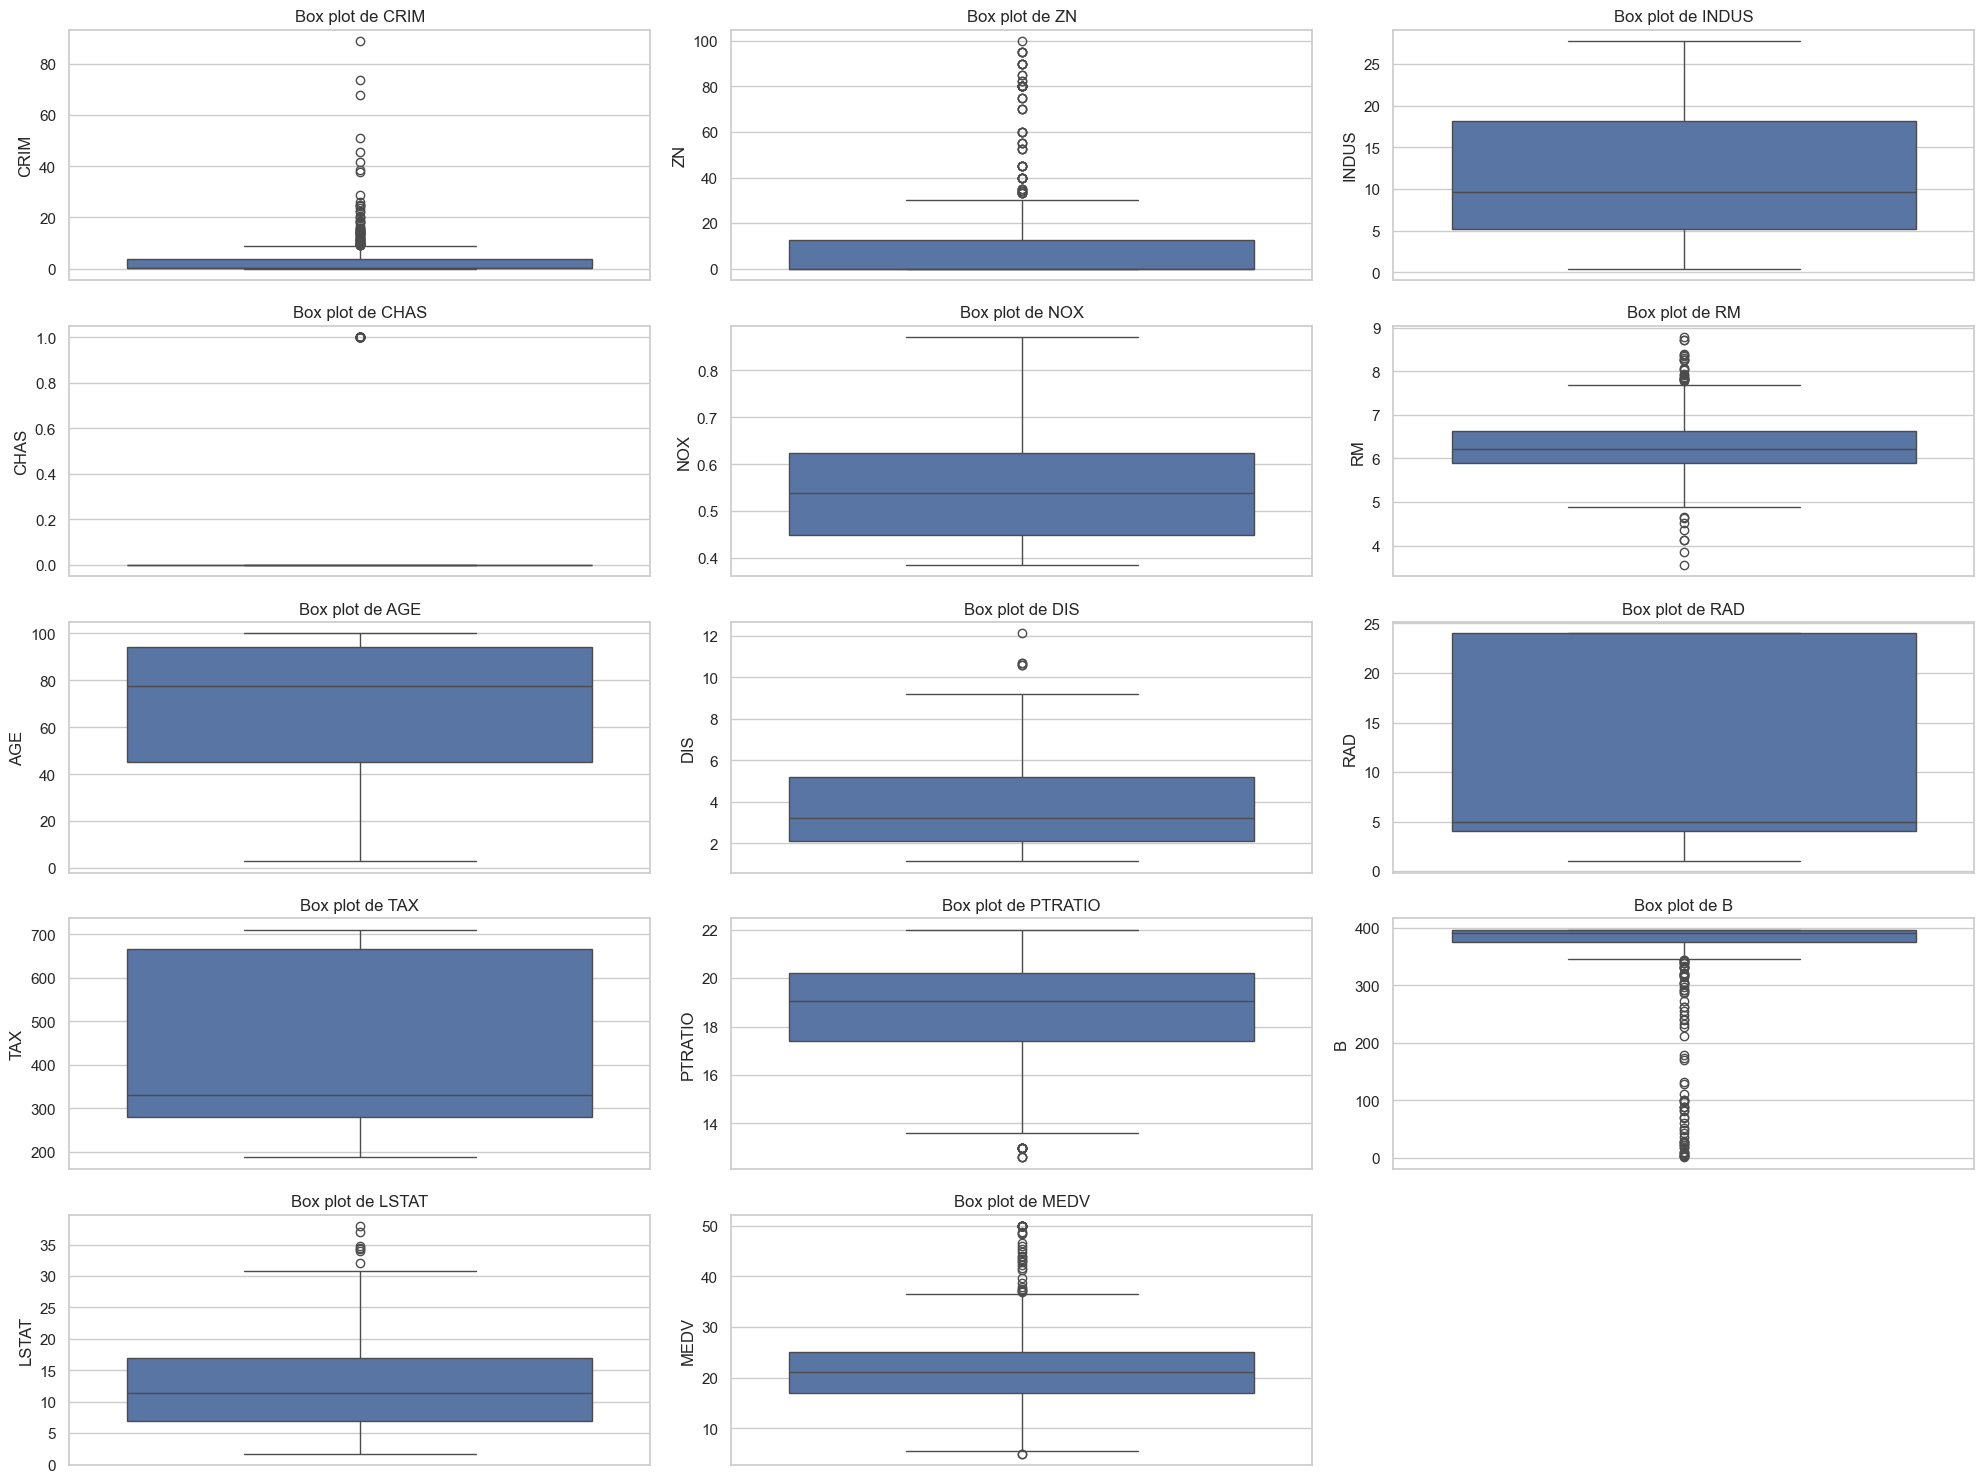

In [7]:
plt.figure(figsize=(20, 15))  

for i, var in enumerate(variables):
    plt.subplot(5, 3, i + 1) 
    sns.boxplot(boston[var]) 
    plt.title(f'Box plot de {var}')
    plt.xlabel('')

plt.tight_layout() 
plt.show()

ANALISIS: 

Los gráficos de caja muestran la distribución de cada variable, poniendo especial enfasis en la mediana, los cuartiles y los valores atípicos. 

1.- CRIM (Índice de criminalidad per cápita): Es una variable que tiene valores muy bajos, cercanos a cero, a excepción de unos valores atípicos, los cuales son bastante más altos. Estos datos indican que esta variable tiene una distribución sesgada a la derecha, lo cual se puede comprobar en el histograma de esta variable que se realizó en el apartado anterior. 

2.- ZN (Proporción de superficie residencial en lotes grandes): Esta variable presenta valores que van entre poco más de cero y aproximádamente 17, con ecepción de algunos valores atípicos, los cuales se aproximan a 100. La mediana de esta variable es aproximadamente 30, con lo cual, se obtiene de la información que muchas de las viviendas de Boston no están emplazadas en lotes residenciales grandes. 

3.- INDUS (Proporción de superficie de negocio no minorista): Esta variable presenta una mediana que se sitúa en alrededor del 10% de la superficie total. Además, su rango intercuartil está entre 5% y 17%. De los datos se puede inferir que la mitad de las superficies destinadas para negocios no minoristas tienen una proporción del 10% o menos del territorio total de cada barrio de Boston. 

4.- CHAS (Río Charles): La mayoría de los valores de esta variable están en cero, con muy pocos valores en uno. Esto indica que muy pocas áreas edificadas están en la ribera del río Charles. 

5.- NOX (Concentración de óxidos de Nitrógeno): La mediana de esta variable está en alrededor de 0,55 (partículas por cada 10 millones de partículas); y su rango intercuartil está entre 0,45 y 0,65. Algunos valores atípicos llegan hasta el 0,80. 

6.- RM (Número promedio de habitaciones por vivienda): La mediana es de aproximadamente 6 habitaciones, con un rango intercuartil que va desde 5,9 hasta 6,7. Además, tiene muchos valores atípicos por mayores que 7, y otros menores que 5. 

7.- AGE (Proporción de viviendas construidas antes de 1940): La mediana de esta variable tiene un valor que se ubica en 77 aproximádamente; y su rango intercuartil está entre 45 y 95. Esto indica que la mayoria de las viviendas de Boston son antiguas, es decir, la mitad de ellas tiene 77 años o más. 

8.- DIS (Distancias a centros de empleo): La mediana tiene un valor aproximado de 3 y su rango intercuartil va desde 2 hasta 5. Esto quiere decir que la mitad de las viviendas tienen una distancia a algún centro de empleo que va desde 2 hasta 3; y la otra mitad de las viviendas tienen un valor en esta variable que abarca desde 3 hasta 5. 

9.- RAD (Índice de accesibilidad a autopistas radiales): La mediana de esta variable es de 5, y su rango intercuartil es de 4 hasta 24. De los datos se extrae que la mitad de las viviendas de Boston no tienen una adecuada accesibilidad a las autopistas radiales. 

10: TAX (Parte del impuesto de bienes inmuebles): La mediana de esta variable es de aproximadamente 330, con un rango intercuartil desde 290 hasta 670. Esto quiere decir que la mitad de las viviendas tienen un impuesto de bienes inmuebles que va desde 290 hasta 330. 

11.- PTRATIO (Ratio de alumnos por profesor): La mediana tiene un valor de alrededor de 19, y el rango intercuartil de esta variable va desde 17 hasta 20. Lo cúal indica que esta variable es bastante estable. 

12.- B (Proporción de personas de ascendencia Afroamericana): La mediana de esta variable tiene un valor de 390, y su rango intercuartil está entre 370 y 400. Con lo cual se puede obtener de los datos que es una variable bastante estable. 

13.- LSTAT (Porcentaje de población de "estatus de bajo nivel"): La mediana de esta variable es de aproximadamente 12, y su rango intercuartil va desde 7 hasta 17, además existen algunos valores atípicos que superan el valor 35. A partir de lo señalado se puede decir que esta variable tiene bastante disperción. 

14.- MEDV (Valor medio de las viviendas): La mediana de esta variable es de 22 aproximadamente, y su rango intercuartil abarca valores desde 17 hasta 25. Además, esta variable presenta algunos valores atípicos que llegan más alla del valor 50. Con lo cual, de los datos se extrae que la mitad de las viviendas tienen un valor que en su mayoría están en el rango comprendido entre 17 y 22 (en miles de dolares). Por otra parte, existen algunas viviendas más que duplican dicho valor. 

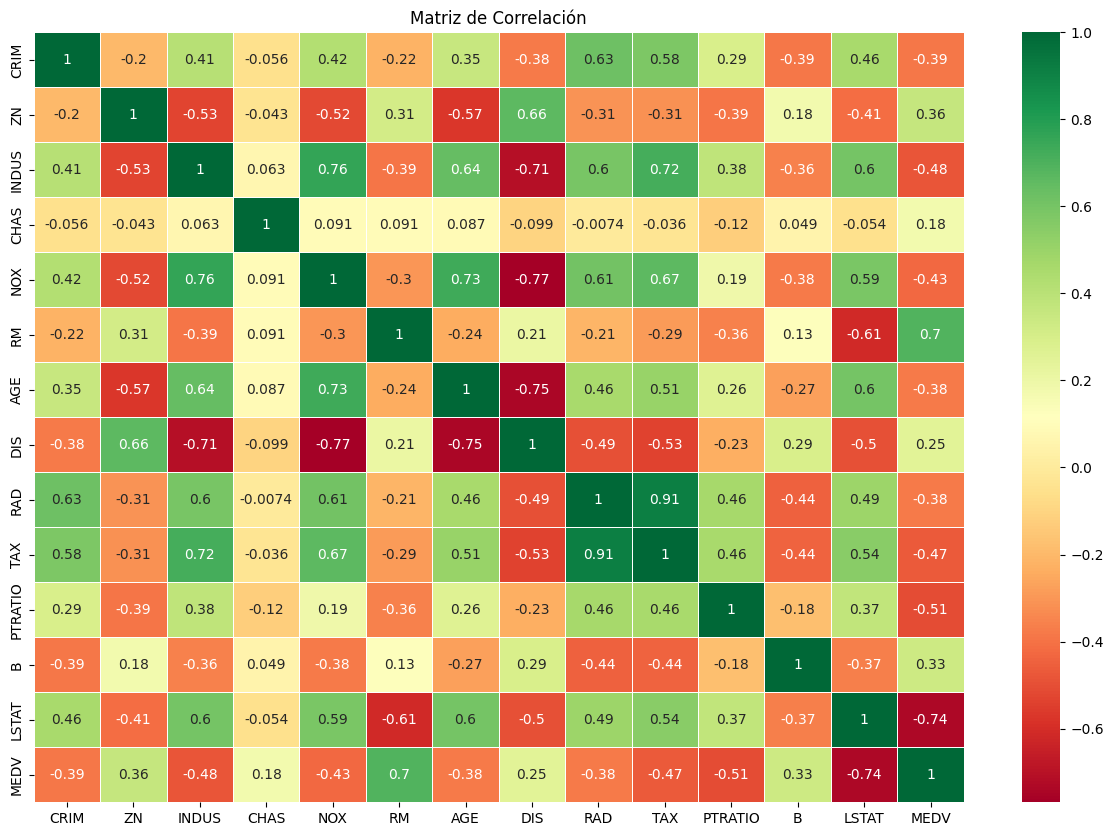

In [19]:
correlation_matrix = boston.corr() 
                                     
plt.figure(figsize=(15, 10))  
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlGn', 
            linewidths=0.5) 
plt.title('Matriz de Correlación')
plt.show() 

ANÁLISIS: 

La matriz de correlación señala las relaciones entre las variables de estudio. En la matriz se puede ver que: 

1.- Las variables INDUS y NOX tienen una correlación de 0,76 que es considerada como alta. Esto se interpreta como que a una mayor proporción de superficie de negocio no minorista se asocia con una mayor concentración de óxidos de Nitrógeno. 

2.- Las variables TAX y RAD tienen una correlación de 0,91 que se considera como una alta correlación. Esto se interpreta como que a un mayor indice de accesibilidad a autopistas se le asocia un impuesto de bienes inmuebles más elevado. 

3.- Las variables MEDV y RM tienen una correlación de 0,70, la que es considerada como alta. Esto se interpreta como que a una mayor cantidad promedio de habitaciones por vivienda se le asocia un mayor valor medio de las viviendas.  

4.- Las variables DIS y NOX tienen una correlación negativa de -0,77 que se considera como elevada. Esto se interpreta como que una mayor distancia a centros de empleo se asocia con una menor concentración de óxidos de Nitrógeno. 

5.- Las variables LSTAT y MEDV tienen una correlación negativa de -0,74 que es considerada como alta. Esto se interpreta como que a un mayor porcentaje de población de bajo estatus se le asocia un menor valor medio de las viviendas. 

6.- Las variables AGE y DIS tienen una correlación negativa de -0,75, la cual es considerada como elevada. Con lo cúal se interpreta que la mayor antigüedad de las viviendas se asocia a menores distancias a centros de empleo. 

7.- Las variables INDUS y DIS tienen una correlación negativa de -0,71 que es considerada como elevada. Esto se interpreta como que a mayor proporción de superficie de negocio no minorista se asocia con menores distancias a centros de empleo. 


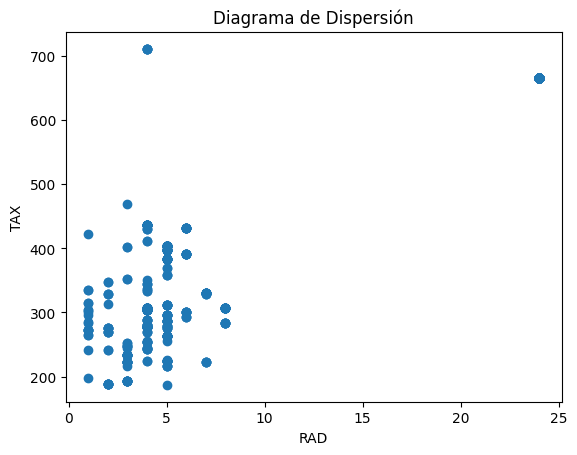

In [21]:
plt.scatter(boston['RAD'], boston['TAX'])
plt.xlabel('RAD')
plt.ylabel('TAX')
plt.title('Diagrama de Dispersión')
plt.show()

ANALISIS: 

La relación entre las variables TAX y RAD es positiva, por lo tanto se puede decir que la relación entre los impuestos que se pagan y el acceso a la autopista esta relacionado.

Por otro lado se pueden observar un outlier,donde la accesibilidad a las autopistas es alta y los impuestos también son altos. Así como también casas con altos indices de accesabilidad RAD y que pagan pocos impuestos.

Podriamos decir que estas 2 variables estan altamente correlacionadas en terminos de su impacto en los precios de las viviendas. 

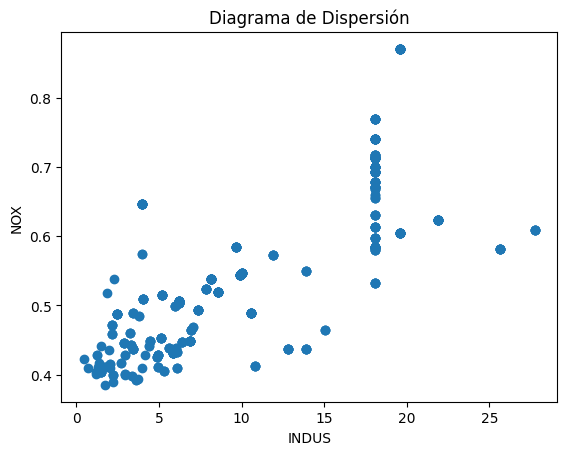

In [22]:
plt.scatter(boston['INDUS'], boston['NOX'])
plt.xlabel('INDUS')
plt.ylabel('NOX')
plt.title('Diagrama de Dispersión')
plt.show() 

ANALISIS:

Los vecindarios con mayor proporción de área industrial tienden a tener niveles más altos de contaminación por óxidos de nitrógeno. Estas variables tienen una correlación positiva de 0.76. 

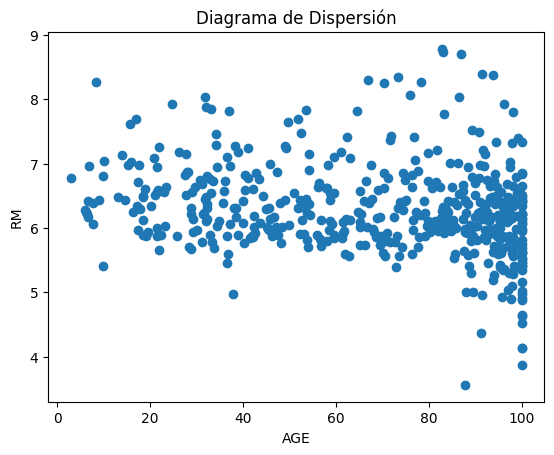

In [23]:
plt.scatter(boston['AGE'], boston['RM'])
plt.xlabel('AGE')
plt.ylabel('RM')
plt.title('Diagrama de Dispersión')
plt.show() 

ANALISIS: 

Se observa que existe una alta consentración de viviendas que tienen entre 80 y 100 años de antigüedad. Además, estas viviendas tienen entre 4 y 9 habitaciones. Por otra parte, las viviendas que son más nuevas tienen un rango en la cantidad de sus habitaciones que fluctua principalmente entre 6 y 8. 

C:\Users\rodri\AppData\Local\Temp\ipykernel_18628\2150445827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_medv.values, y=corr_with_medv.index, palette='coolwarm')


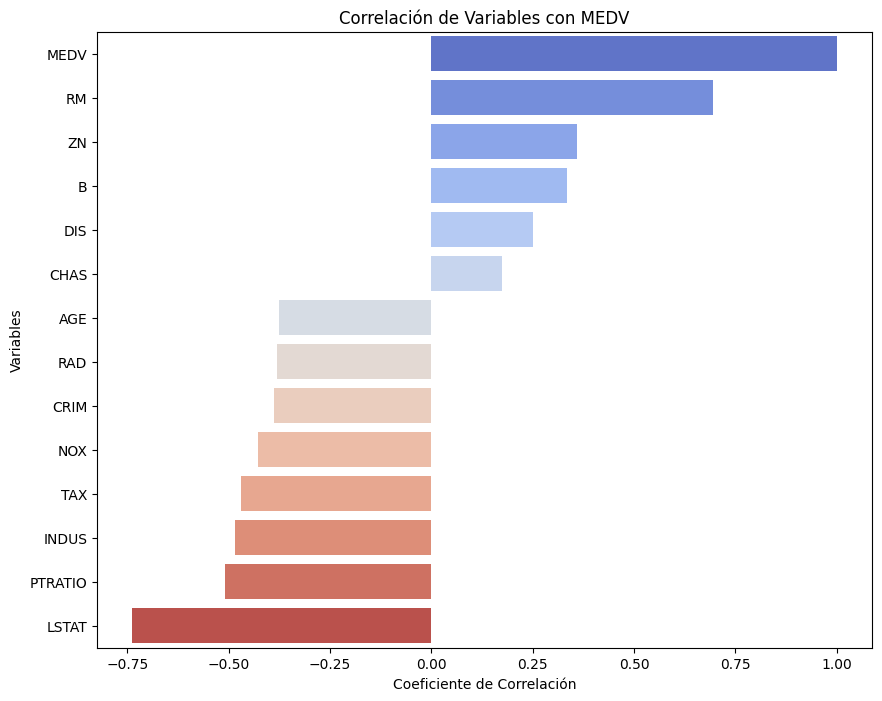

In [15]:
corr_with_medv = boston.corr()['MEDV'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_medv.values, y=corr_with_medv.index, palette='coolwarm') 

plt.title('Correlación de Variables con MEDV')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.show() 

ANALISIS: 

Este gráfico muestra las correlaciones existentes entre la variable 'MEDV' con el resto de las variables de estudio. En este apartado se puede observar que las variables que tienen una mayor correlación con el valor medio de los precios de las viviendas son 'el número promedio de habitaciónes por vivienda', 'el porcentaje de población de estatus de bajo nivel' y 'el ratio de alumnos por profesor'. En el caso de la variable 'el número promedio de habitaciónes por vivienda' su correlación es positiva, por lo cual entre más cara es la viviendas, más habitaciones tendrá esta, y por el contrario, entre más bajo es el precio de la viviendas, menos habitaciones tendrá esta. En el caso de la variable 'el porcentaje de población de estatus de bajo nivel', esta presenta una fuerte correlación negativa con la variable MEDV, lo cual significa que entre más alto es el precio de la viviendas, menos población de bajos ingresos puede acceder a ellas; y por el contrario, entre más bajo es el precio de la vivienda, más gente de estatus socioeconómico bajo puede acceder a ellas. Finalmente, la variable 'el ratio de alumnos por profesor' presenta una fuerte correlación negativa con la variable 'valor medio de las viviendas', lo cual implica que en los barrios donde las viviendas son más caras, los colegios tienen cursos con menos alumnos por profesor; y por el contrario, en los barrios donde las viviendas son más económicas los colegios tienen cursos en donde hay más alumnos por profesor.  

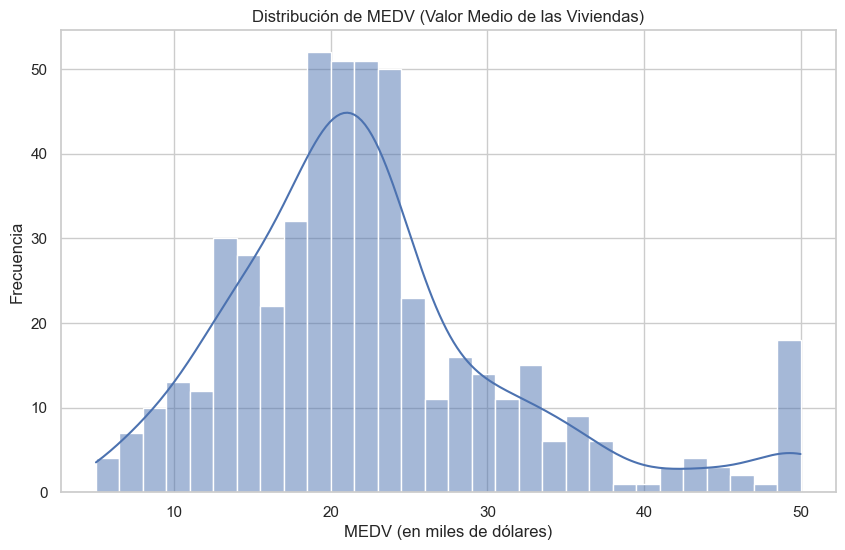

In [28]:

plt.figure(figsize=(10, 6))
sns.histplot(boston['MEDV'], bins=30, kde=True)
plt.title('Distribución de MEDV (Valor Medio de las Viviendas)')
plt.xlabel('MEDV (en miles de dólares)')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
medv_mean = boston['MEDV'].mean()
medv_median = boston['MEDV'].median()
medv_mode = boston['MEDV'].mode()[0]
medv_std = boston['MEDV'].std()
medv_var = boston['MEDV'].var()
medv_skew = boston['MEDV'].skew()
medv_kurtosis = boston['MEDV'].kurtosis() 

print("La media de la variable MEDV es: ",medv_mean) 
print("La mediana de la variable MEDV es: ",medv_median) 
print("La moda de la variable MEDV es: ", medv_mode) 
print("La desviación estandar de la variable MEDV es: ", medv_std) 
print("La varianza de la variable MEDV es: ", medv_var)
print("La asimetría de la distribución de frecuencias es: ", medv_skew) 
print("La kurtosis de la distribución de frecuencias es: ", medv_kurtosis) 

La media de la variable MEDV es:  22.532806324110677
La mediana de la variable MEDV es:  21.2
La moda de la variable MEDV es:  50.0
La desviación estandar de la variable MEDV es:  9.197104087379818
La varianza de la variable MEDV es:  84.58672359409856
La asimetría de la distribución de frecuencias es:  1.1080984082549072
La kurtosis de la distribución de frecuencias es:  1.495196944165818


In [11]:
medv = boston['MEDV']
shapiro_test = stats.shapiro(medv) 

print('Estadístico de Shapiro-Wilk es:', shapiro_test.statistic)
print('Valor p:', shapiro_test.pvalue)

Estadístico de Shapiro-Wilk es: 0.9171758803890093
Valor p: 4.941386258635722e-16


ANALISIS DE LA VARIABLE MEDV: 

De estos datos se obtiene que el valor medio de las viviendas se encuentra en 22,53 (en miles de dolares). Al ser su mediana 21,2 quiere decir que la mitad de las viviendas tienen un precio menor o igual a 21,2 (en miles de dolares), y la otra mitad de las viviendas tienen un valor mayor a 21,2 (en miles de dolares). Otro dato interesante de analizar es la moda, la cual tiene un valor de 50, lo cual indica que el precio que más se repite entre las viviendas es este valor. Además, de estos datos se obtiene que los precios de las viviendas fluctuan en torno a la media en un rango que se mueve en más menos 9,20 (en miles de dolares). El valor de la varianza de 84,59 indica que hay mucha variabilidad entre los precios de las viviendas. Siguiendo con el análisis, el hecho de que exista una asimetría con el valor positivo quiere decir que la función de distribución de frecuencias está sesgada hacia la derecha, con lo cual los valores más altos en el precio medio de las viviendas son menos frecuentes. Finalmente, el hecho de que la kurtosis sea positiva quiere decir que existen bastantes valores extremos entre los precios medios de las viviendas. 

Según el test de Shapiro - Wilk aplicado a la variable MEDV para determinar si esta sigue una distribución de probabilidad Normal, se llegó a la conclusión de que su distribución de probabilidad no es Normal ya que el Valor p es mucho menor que el umbral de 0,05. Dicho umbral es la referencia para determinar si la distribución de probabilidad de la variable se ajusta a una distribución Normal o no. Investigando se llegó a la conclusión de que los valores de la variable MEDV que superaban el valor 50 fueron sacados de la estadística, y para compensar esto se incluyó un dato artificialmente con el valor 50 y con una frecuencia de 17 aproximadamente. 

<Axes: xlabel='MEDV', ylabel='Count'>

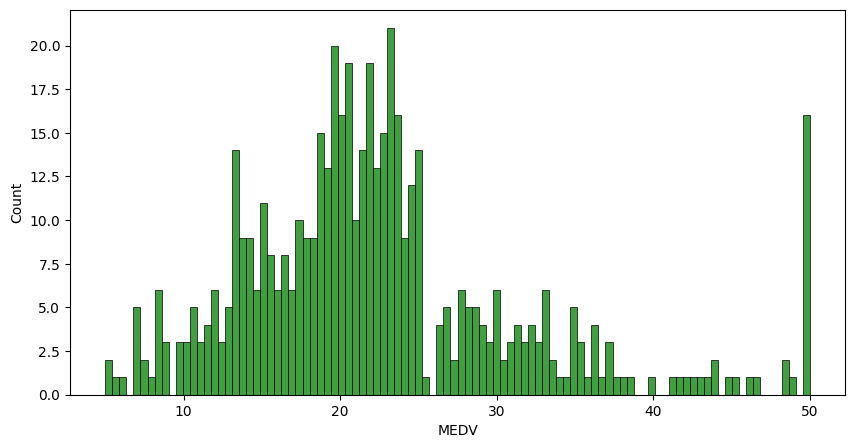

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(boston["MEDV"],
             kde=False,
             color='g',
             bins=100)  

In [28]:

percentil_10 = boston['MEDV'].quantile(0.1)
percentil_25 = boston['MEDV'].quantile(0.25)
percentil_75 = boston['MEDV'].quantile(0.75)
percentil_90 = boston['MEDV'].quantile(0.9)

# Definir los rangos y etiquetas
bins = [-float('inf'), percentil_25, percentil_75, percentil_90, float('inf')]
etiquetas = ['Bajo', 'Medio', 'Alto', 'Muy Alto']

# Crear la nueva columna categórica
boston['Categoria_Precio'] = pd.cut(boston['MEDV'], bins=bins, labels=etiquetas)

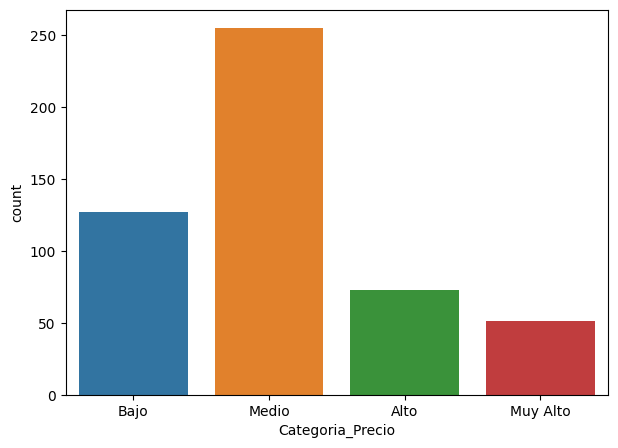

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(x=boston['Categoria_Precio'], hue=boston['Categoria_Precio']);

In [31]:
#Cuantas casas hay para Categoria-Precio
boston['Categoria_Precio'].value_counts()  

Categoria_Precio
Medio       255
Bajo        127
Alto         73
Muy Alto     51
Name: count, dtype: int64

ANALISIS: 

La variable 'MEDV' se subdividió en cuatro subgrupos. El primer grupo abarca desde el percentíl 1 hasta el percentíl 10, el segundo grupo abarca desde el percentíl 11 hasta el percentíl 25, el tercer subgrupo abarca desde el percentíl 26 hasta el percentíl 75 y el cuarto subgrupo abarca desde el percentíl 76 hasta el percentíl 90.    

In [33]:
boston[boston['Categoria_Precio'] == 'Muy Alto'].head(10).sort_values(by='MEDV', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Categoria_Precio
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0,Muy Alto
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0,Muy Alto
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0,Muy Alto
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0,Muy Alto
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,Muy Alto
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3,Muy Alto
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7,Muy Alto
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,Muy Alto
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4,Muy Alto
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9,Muy Alto


In [37]:
casas_50k = boston[boston['MEDV'] == 50]
cantidad_casas_50k = casas_50k.shape[0]
print("Hay una cantidad de", cantidad_casas_50k, "viviendas con un precio de 50 mil dolares")    

Hay una cantidad de 16 viviendas con un precio de 50 mil dolares


ANALISIS: 

Continuando con el análisis de la variable 'MEDV', se observa que 16 viviendas tienen un precio de 50 mil o inclusive más caras. A continuación se procederá a analizar las características de dichas viviendas.  

In [38]:
casas_50k.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,16.000000,16.000000,16.000000,16.000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.0
mean,2.703412,19.062500,11.860625,0.375,0.566569,7.484000,77.637500,2.586087,10.625000,415.437500,16.48125,381.743125,4.355000,50.0
std,3.145228,35.129226,8.187944,0.500,0.089586,1.062342,26.934609,1.592896,9.415413,188.201654,2.88056,12.920621,2.321221,0.0
min,0.013810,0.000000,0.460000,0.000,0.401000,4.970000,24.800000,1.129600,1.000000,193.000000,13.00000,347.880000,1.730000,50.0
25%,0.409203,0.000000,3.647500,0.000,0.500000,6.932750,63.650000,1.350650,4.750000,261.750000,14.62500,375.105000,2.967500,50.0
50%,1.491190,0.000000,18.100000,0.000,0.605000,7.853000,90.200000,2.043300,5.000000,403.000000,14.70000,386.495000,3.510000,50.0
75%,5.091160,20.000000,18.470000,1.000,0.631000,8.099750,96.975000,2.970600,24.000000,666.000000,20.20000,390.925000,4.752500,50.0
max,9.232300,95.000000,19.580000,1.000,0.668000,8.725000,100.000000,5.885000,24.000000,666.000000,20.20000,395.520000,9.530000,50.0


ANALISIS: 

Tasa de criminalidad (CRIM): La media de CRIM es 2.70, lo que indica que estas viviendas de alto precio se encuentran en vecindarios con una tasa de criminalidad relativamente baja.

Proporción de área industrial (INDUS): La media de INDUS es 11.86, lo que podría indicar que algunas de estas viviendas de alto precio se encuentran cerca de áreas industriales.

Accesibilidad a autopistas radiales (RAD): La media de RAD es 10.63, lo que sugiere una buena accesibilidad a las principales autopistas, lo cual suele estar asociado con propiedades de mayor valor. Impuestos a la propiedad (TAX): Como era de esperarse, la media de TAX es 415.44, lo que indica altos impuestos a la propiedad para estas viviendas de alto precio.

Número de habitaciones (RM): La media de RM es 7.48, lo que sugiere que estas viviendas tienen, en promedio, un gran número de habitaciones.

In [39]:
#Analisis estadistico de las casas con valor Bajo
boston[boston['Categoria_Precio'] == 'Bajo'].describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,10.986203,0.393701,17.018189,0.039370,0.668157,5.886496,92.868504,2.277718,17.141732,567.834646,19.651969,285.830315,21.067795,12.726772
std,14.208815,2.698934,4.641761,0.195244,0.094925,0.592155,9.240411,1.173490,9.479907,153.257837,1.774996,143.964769,5.972431,2.974533
min,0.024980,0.000000,1.890000,0.000000,0.448000,4.138000,37.800000,1.137000,1.000000,188.000000,14.700000,0.320000,7.880000,5.000000
25%,1.513335,0.000000,18.100000,0.000000,0.603000,5.550500,90.550000,1.598450,5.000000,403.000000,20.200000,171.090000,17.115000,10.850000
50%,7.752230,0.000000,18.100000,0.000000,0.679000,5.950000,95.400000,1.866200,24.000000,666.000000,20.200000,363.020000,19.920000,13.400000
75%,13.795750,0.000000,18.100000,0.000000,0.713000,6.342000,98.850000,2.334800,24.000000,666.000000,20.200000,396.660000,24.275000,15.000000
max,88.976200,25.000000,27.740000,1.000000,0.871000,7.313000,100.000000,6.818500,24.000000,711.000000,21.200000,396.900000,37.970000,17.000000


ANALISIS: 

Esta comparación nos muestra que, en general, las viviendas de precios bajos tienden a estar ubicadas en áreas con mayores tasas de criminalidad, lo cual es consistente con las expectativas del mercado inmobiliario. Sin embargo, también hay una mayor variabilidad dentro de este subconjunto, lo que sugiere que algunas viviendas de precios bajos pueden estar en áreas más seguras, y viceversa.

Tambien tienen una media de DIS inferior a la media total lo cual indica que pueden estar mas alejadas de los centros de empleo.

La variable Age indica una media de 92 años, son las casas con mas años con diferencia.

Tienen una media de 5 habitaciones menos que el resto de viviendas y el precio medio es de 12k $

Tiene un indice medio LSTAT de 21 lo que concuerda con un status socieeconomico bajo.

Hay un dato curioso y es el TAX que podria ser debido al alto indice de accesabilidad a las autopistas.

La ZN (Proporción de zona residencial):es de las mas bajas con una media de 0.39

In [40]:
#Analisis estadistico de las casas con valor Medio
boston[boston['Categoria_Precio'] == 'Medio'].describe()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,1.310119,9.907843,10.654824,0.054902,0.528615,6.113102,62.919608,4.274889,7.505882,375.827451,18.652157,377.871412,11.673529,21.227843
std,2.873049,20.857181,6.287742,0.228237,0.100393,0.414580,26.687832,2.102887,7.264340,141.208792,1.859193,51.771910,4.631557,2.210544
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.863000,6.000000,1.454700,1.000000,188.000000,13.000000,22.010000,3.590000,17.100000
25%,0.075700,0.000000,5.640000,0.000000,0.448000,5.886500,42.000000,2.513650,4.000000,282.500000,17.800000,381.055000,8.245000,19.400000
50%,0.167600,0.000000,9.690000,0.000000,0.515000,6.108000,66.100000,3.747600,5.000000,311.000000,19.000000,393.290000,11.100000,21.200000
75%,0.633860,12.500000,18.100000,0.000000,0.581000,6.365000,87.500000,5.502700,6.000000,411.000000,20.200000,396.900000,14.115000,23.100000
max,18.811000,85.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,34.370000,25.000000


ANALISIS: 

El indice CRIM tiene un valor medio de 1.31 por lo tanto este tipo de casas no se encuentran en lugares de alta criminalidad.

La tasa ZN indica una proporcion de zona residencial cercana a la media total.

La media de AGE es de 62 años inferior a las casas de valor bajo.

Tiene un indice medio LSTAT de 11 lo que concuerda con un status socieeconomico bajo.

Las casas tienen un precio medio de 21k $

In [42]:
#Analisis estadistico de las casas con valor Alto
boston[boston['Categoria_Precio'] == 'Alto'].describe()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.656024,25.630137,5.770274,0.109589,0.480056,6.743438,51.661644,4.753190,5.561644,306.739726,17.138356,384.465479,7.047260,29.760274
std,2.262153,30.403653,4.443401,0.314539,0.072476,0.525740,28.016610,2.143492,4.904608,102.126695,2.026260,27.702868,3.332307,2.502817
min,0.009060,0.000000,1.250000,0.000000,0.400000,3.561000,2.900000,1.285200,1.000000,187.000000,12.600000,179.360000,2.940000,25.100000
25%,0.041130,0.000000,2.890000,0.000000,0.433000,6.604000,29.100000,3.215700,3.000000,254.000000,16.000000,384.460000,4.730000,27.900000
50%,0.079780,20.000000,4.860000,0.000000,0.458000,6.782000,49.300000,4.267300,5.000000,284.000000,17.600000,392.200000,6.360000,29.600000
75%,0.190730,40.000000,6.410000,0.000000,0.507000,7.014000,76.500000,6.062200,7.000000,329.000000,18.400000,394.760000,8.050000,31.700000
max,14.438300,100.000000,19.580000,1.000000,0.718000,7.420000,100.000000,12.126500,24.000000,666.000000,20.900000,396.900000,19.780000,34.700000


ANALISIS: 

El indice CRIM tiene un valor medio de 1.31 por lo tanto este tipo de casas no se encuentran en lugares de alta criminalidad.

La tasa ZN indica una proporcion de zona residencial mas alta que la media total de 25. y la tasa INDUS es mas baja que la media total.

La media de AGE es de 51 años inferior a las casas de valor bajo.

Tiene un indice medio LSTAT de 7 lo que concuerda con un status socieeconomico medio alto.

Las casas tienen un precio medio de 29k $

In [43]:
#Analisis estadistico de las casas con valor muy Alto
boston[boston['Categoria_Precio'] == 'Muy Alto'].describe()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.004413,25.539216,6.582157,0.156863,0.509388,7.477020,60.564706,3.802778,6.568627,318.137255,16.378431,387.321961,4.620392,43.131373
std,2.088315,33.403419,6.287316,0.367290,0.088048,0.721844,29.898353,1.967295,6.047330,134.199407,2.271679,10.270968,1.938093,6.017192
min,0.013110,0.000000,0.460000,0.000000,0.394000,4.970000,8.400000,1.129600,1.000000,193.000000,13.000000,347.880000,1.730000,34.900000
25%,0.056910,0.000000,2.680000,0.000000,0.437000,7.085500,32.700000,2.150900,3.000000,223.500000,14.700000,383.915000,3.160000,36.750000
50%,0.210380,20.000000,3.970000,0.000000,0.488000,7.520000,62.200000,3.375100,5.000000,264.000000,17.000000,390.300000,4.140000,43.500000
75%,0.576815,39.000000,6.200000,0.000000,0.605000,7.926000,90.200000,5.164950,6.000000,398.000000,17.950000,395.450000,5.225000,50.000000
max,9.232300,95.000000,19.580000,1.000000,0.668000,8.725000,100.000000,8.906700,24.000000,666.000000,20.200000,396.900000,9.530000,50.000000


ANALISIS: 

El indice CRIM tiene un valor medio de 1.31 por lo tanto este tipo de casas no se encuentran en lugares de alta criminalidad.

La tasa ZN indica una proporcion de zona residencial más alta a la media total de 25.

La media de AGE es de 60 años inferior a las casas de valor bajo.

Tiene un indice medio LSTAT de 4 lo que concuerda con un status socieeconomico mas alto.

Las casas tienen un precio medio de 43k $

### MAPA

 Localizamos en este link https://geodacenter.github.io/data-and-lab/boston-housing/, la latitud y la longitud por cada casa.

 Se realizo un analisis y logramos obtener 132 casas que coinciden con la ciudad de boston.
 
 Con estos datos de Lat y Lon, hemoss de relacionarse todo lo anterior con datos geográficos adicionales de la ciudad para confirmar esta hipótesis.

In [1]:
import folium
import pandas as pd
import json
import random

# Crear el mapa centrado en Boston
mapa_boston = folium.Map(location=[42.3554334, -71.060511], zoom_start=11)

# Generar una lista de colores
colors = [
    '#ff0000', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', '#00ffff', '#ff8000', 
    '#8000ff', '#0080ff', '#80ff00', '#00ff80', '#ff0080', '#800080', '#808000'
]

# Leer el archivo GeoJSON
with open('Boston_data_geo/Boston_Neighborhoods.geojson') as f:
    geojson_data = json.load(f)

# Crear un diccionario para almacenar el color de cada ciudad
town_colors = {}

# Asignar un color aleatorio a cada ciudad
for feature in geojson_data['features']:
    zone_name = feature['properties']['Name']  # Ajusta esto según la estructura de tu GeoJSON
    town_colors[zone_name] = random.choice(colors)

# Definir una función de estilo para el GeoJSON
def style_function(feature):
    zone_name = feature['properties']['Name']  # Ajusta esto según la estructura de tu GeoJSON
    return {
        'fillColor': town_colors[zone_name],
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5
    }

# Cargar el GeoJSON y aplicar el estilo
folium.GeoJson(
    geojson_data,
    style_function=style_function
).add_to(mapa_boston)

# Cargar datos adicionales (opcional)
data_2 = pd.read_csv('Boston_data_geo/boston.csv')
df_boston_2 = pd.DataFrame(data_2)

# Agrupar los marcadores por el nombre de la ciudad y asignarles colores distintos
town_markers = folium.FeatureGroup(name='Marcadores agrupados por TOWN').add_to(mapa_boston)

# Crear un diccionario para almacenar los colores de las ciudades
town_color_dict = {}

# Asignar un color aleatorio a cada ciudad
for town in df_boston_2['TOWN'].unique():
    town_color_dict[town] = random.choice(colors)

# Añadir marcadores a cada ciudad con su respectivo color
for index, row in df_boston_2.iterrows():
    color = town_color_dict[row['TOWN']]
    folium.Marker(location=[row["LON"]+0.14, row["LAT"]-0.037], 
                  popup=row["TOWN"],
                  icon=folium.Icon(color='white', icon_color=color)
                 ).add_to(town_markers)

# Añadir control de capas
folium.LayerControl().add_to(mapa_boston)

# Mostrar el mapa
mapa_boston


Los Markers fueron diferenciados por color y por cada zona de la ciudad
- Los colores amarillo son la zona Boston Allston-Brighton
- Los colores verde claro son la zona Boston Hyde Park
- Los colores verde manzana son la zona Boston West Roxbury
- Los colores Azules son la zona Boston Mattapan
- Los colores dorado son la zona Boston Charlestown
- Los colores rojo son la zona Boston Dorchester
- Los colores Amarillo claro son la zona Boston Downtown
- Los colores Morado oscuro son la zona Boston West Roxbury
- Los colores Morados son la zona Boston North End

CONCLUSIONES: 

- Boston presenta una tasa de criminalidad per cápita que está muy cerca de cero. 

- La proporción de superficie residencial en lotes grandes es muy baja. 

- Una cantidad de viviendas muy pequeña está en la rivera del río Charles. 

- La concentración de oxido de Nitrogeno en Boston es baja ya que su media se encuentra en 0,55 partículas por cada 10 millones de particulas de oxigeno. Esto implica que Boston está poco contaminado por este contaminante. 

- De media las viviendas de Boston tienen 6,28 habitaciones, con una desviación estandar de 0,70. 

- La proporción de viviendas en propiedad ocupadas y que además fueron construidas antes de 1940, tiene una media de 68,57%; lo cual indica que las viviendas de Boston son antiguas. 

- Alrededor del 28% de las viviendas de Boston tienen buen acceso a alguna autopista radial. 

- Alrededor del 25% de las viviendas paga un impuesto de vienes inmuebles significativamente más alto que lo que paga el resto de las viviendas de Boston. 

- El ratio de alumnos por profesor tiene una media de 18,46, el que varía entre 12,60 y 22,00, concentrandose principalmente entre los valores 17 y 22. 

- El porcentaje de la población de estatus de bajo nivel tiene una media de 12,65%, con un rango varíabilidad muy amplio que va desde 1,73% hasta 37,97%. Gran parte de los barrios de Boston tienen un nivel de pobreza que no supera el 20%, aunque hay algunas zonas en donde el nivel de pobreza supera el 20% llegando inclusive al 37,97%. 

- El precio medio de las viviendas en Boston está en 22,53 (en miles de dolares), y su rango de precios fluctua entre los 5,00 y los 50,00 con una desviación estandar de 9,19.

- En los que respecta a la correlación entre las variables de estudio, se observa que: 
    + 1.- Las variables INDUS y NOX tienen una correlación de 0,76. Esto se interpreta como que a una mayor proporción de superficie de negocio no minorista se asocia con una mayor concentración de óxidos de Nitrógeno. 
    + Las variables TAX y RAD tienen una correlación de 0,91. Esto se interpreta como que a un mayor indice de accesibilidad a autopistas se le asocia un impuesto de bienes inmuebles más elevado. 
    + Las variables MEDV y RM tienen una correlación de 0,70. Esto se interpreta como que a una mayor cantidad promedio de habitaciones por vivienda se le asocia un mayor valor medio de las viviendas.  
    + Las variables DIS y NOX tienen una correlación negativa de -0,77. Esto se interpreta como que una mayor distancia a centros de empleo se asocia con una menor concentración de óxidos de Nitrógeno. 
    + Las variables LSTAT y MEDV tienen una correlación negativa de -0,74. Esto se interpreta como que a un mayor porcentaje de población de bajo estatus se le asocia un menor valor medio de las viviendas. 
    + Las variables AGE y DIS tienen una correlación negativa de -0,75. Con lo cúal se interpreta que la mayor antigüedad de las viviendas se asocia a menores distancias a centros de empleo. 

- En el análisis de las correlaciones entre la variable MEDV con el resto de variables en estudio se observa que los valores más significativos son: 
    + La variable LSTAT presenta una fuerte correlación negativa con la variable MEDV, lo cual implica que entre más alto es el precio de la viviendas, menos población de bajos ingresos puede acceder a ellas; y por el contrario, entre más bajo es el precio de la vivienda, más gente de estatus socioeconómico bajo puede acceder a dichas viviendas. 
    + La variable PTRATIO presenta una fuerte correlación negativa con la variable MEDV, lo cual implica que en los barrios en donde las viviendas son más caras, los colegios tienen cursos con menos alumnos por profesor; y por el contrario, en los barrios donde las viviendas son más económicas los colegios tienen cursos en donde hay más alumnos por profesor. A pesar de este, cabe mencionar que la variable PTRATIO fluctua entre los valores 17 y 20 con una mediana de 19. 

- Se aplicó a los datos de la variable MEDV el test de Shapiro - Wilk para averiaguar si los datos de esta variable seguian una distribución de probabilidad Normal, lo cual fué descartado. Luego de realizada una investigación se llegó a la conclusión de que los datos de esta variable fueron manipulados, razón por la cual se decidió no continuar averiguando a que tipo de distribución se ajustan los datos de esta variable.  

- Se realizó un estudio del precio de las viviendas. Dicho estudio consistió en subdividir la franja de precios de las viviendas en subgrupos con el propósito de rescatar las principales características de cada una de estas franjas de precios de las viviendas de Boston. Los subgrupos se nombraron como precio bajo, precio medio, precio alto y precio muy alto. Los resultados más relevantes fueron: 
    + La tasa de criminalidad percapita de las viviendas con un precio muy alto tiene una media de 2,7; siendo más baja que el 3,6 que presentan todas las viviendas de Boston. 
    + Las viviendas con un muy alto valor tienen una antigüedad de 77 años, siendo similar a la media de las viviendas de Boston.  
    + La cantidad de habitaciones de media que tienen las viviendas con un precio muy alto es de 7,48; siendo una cantidad más elevada que los 6,28 de media que presentan las viviendas de Boston. 
    + La tasa de criminalidad percápita de las viviendas con un precio bajo es de 10,98; siendo mucho más alto que la media de esta variable que tiene un valor de 3,6. 
    + Las viviendas con un valor bajo tienen de media 92 años, cifra mayor que los 77 años de media que tienen las viviendas de Boston. 
    + La cantidad media de habitaciones de las viviendas con un bajo valor es de 5,89; siendo que la cantidad de habitaciones que tienen de media las viviendas de Boston se ubica en 6,28. 

  